In [1]:
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
conn = pymysql.connect(
    host="127.0.0.1",
    user="root",
    password="password",
    database="olist"
)

In [3]:
delivery_sales_sql = """
    SELECT
    	category_name_translation.product_category_name_english AS category_name,
    	COUNT(products.product_id) AS count_sales,
        AVG(DATEDIFF(orders.order_delivered_customer_date, orders.order_purchase_timestamp)) AS actual_delivery_date,
        AVG(DATEDIFF(orders.order_delivered_customer_date, orders.order_estimated_delivery_date)) AS delay_delivery_date
    FROM
        orders
    INNER JOIN
    	order_items
    ON
        orders.order_id = order_items.order_id
    INNER JOIN
    	products
    ON
    	order_items.product_id = products.product_id
    INNER JOIN
    	category_name_translation
    ON
    	products.product_category_name = category_name_translation.product_category_name
    GROUP BY
    	category_name
    ORDER BY
    	count_sales DESC;
"""

In [4]:
delivery_sales_df = pd.read_sql(delivery_sales_sql, conn)
delivery_sales_df.to_csv("delivery_sales.csv", header=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_40480\2142120313.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  delivery_sales_df = pd.read_sql(delivery_sales_sql, conn)


In [7]:
delivery_sales_df

,category_name,count_sales,actual_delivery_date,delay_delivery_date
0,bed_bath_table,11115,12.7505,-11.6562
1,health_beauty,9670,11.9150,-11.9701
2,sports_leisure,8641,12.0815,-12.0101
3,furniture_decor,8334,12.8352,-12.3995
4,computers_accessories,7827,13.1536,-12.4199
...,...,...,...,...
66,arts_and_craftmanship,24,5.6667,-6.7917
67,la_cuisine,14,7.6429,-16.3571
68,cds_dvds_musicals,14,10.5714,-16.8571
69,fashion_childrens_clothes,8,8.8571,-15.7143


C:\Users\minni\AppData\Local\Temp\ipykernel_40480\747712266.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(delivery_sales_df["category_name"], rotation=90)


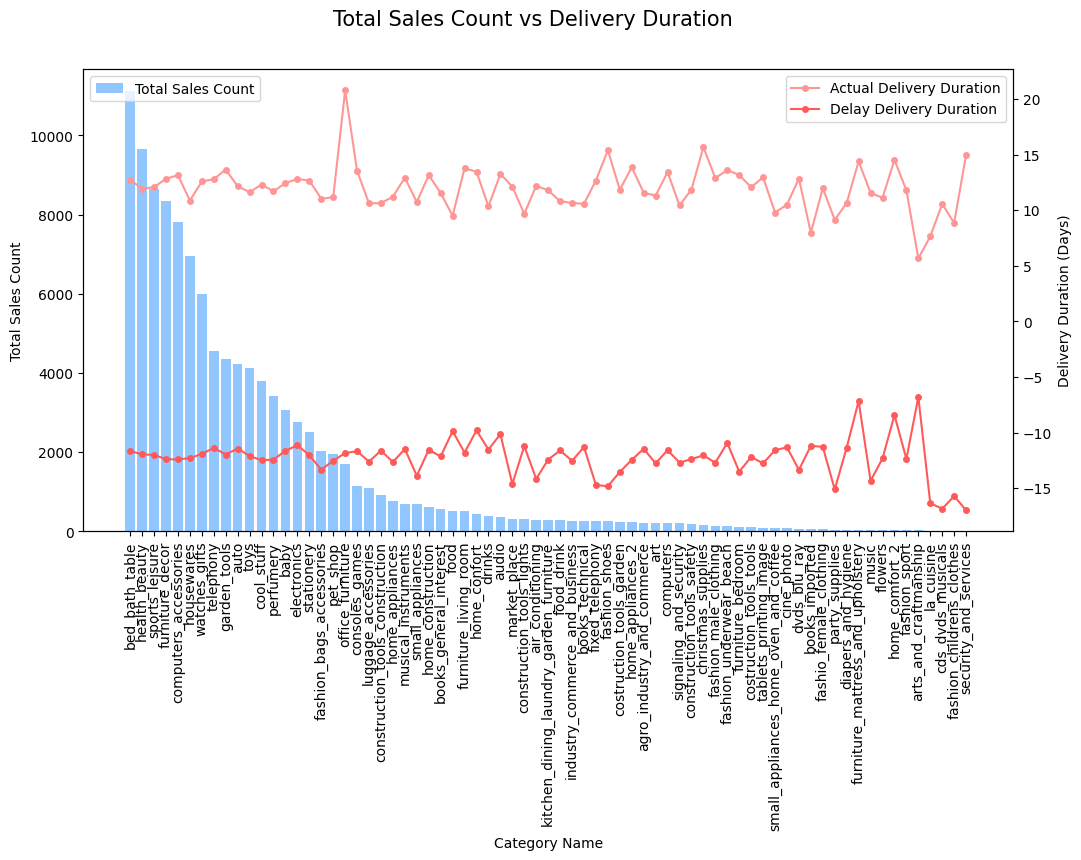

In [9]:
plt.style.use("seaborn-v0_8-pastel")
figure, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(delivery_sales_df["category_name"], delivery_sales_df["count_sales"], label="Total Sales Count")
ax1.set_xlabel("Category Name")
ax1.set_ylabel("Total Sales Count")
ax1.set_xticklabels(delivery_sales_df["category_name"], rotation=90)

ax2 = ax1.twinx()
ax2.plot(delivery_sales_df["category_name"], delivery_sales_df["actual_delivery_date"], color="#FF9696", marker="o", markersize=4, label="Actual Delivery Duration")
ax2.plot(delivery_sales_df["category_name"], delivery_sales_df["delay_delivery_date"], color="#FF5A5A", marker="o", markersize=4, label="Delay Delivery Duration")
ax2.set_ylabel("Delivery Duration (Days)")

ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

figure.suptitle("Total Sales Count vs Delivery Duration", size=15)
plt.savefig("delivery_sales.png", bbox_inches='tight')